## Import Library and Data Collection

In [1]:
import requests   
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from time import sleep

In [2]:
Samsung_M31_Phone_reviews_description = []
Samsung_M31_Phone_reviews_persons = []

#### 1. Scrapping ( Samsung_M31_Phone_reviews )

In [3]:
for i in range(1, 10):
    review_desc = []  
    review_person = [] 
    
    url = "https://www.amazon.in/Samsung-Galaxy-Prime-Ocean-Storage/product-reviews/B085J3GN6M/ref=cm_cr_getr_d_paging_btm_prev_1?&reviewerType=all_reviews&pageNumber="
    response = requests.get(url)
    
    soup = bs(response.content, "html.parser")
    
    reviews_data = soup.findAll("span", attrs = {"class", "a-size-base review-text review-text-content"})
    reviews_writter = soup.findAll("span", attrs = {"class", "a-profile-name"})

In [4]:
for i in range(len(reviews_data)):
    review_desc.append(reviews_data[i].text)    
    Samsung_M31_Phone_reviews_description = Samsung_M31_Phone_reviews_description + review_desc
    
for i in range(len(reviews_writter)):
    review_person.append(reviews_writter[i].text)
    Samsung_M31_Phone_reviews_persons = Samsung_M31_Phone_reviews_persons + review_person

#### 2. Reviews in raw format

In [5]:
Samsung_M31_Phone_reviews_description[:2]

["\n\n  This is best thing you can get at this price from a reputed brand with Made in India tag. First time I ordered on the first day of online launch and am happy. I'm writing after few days of usage, but this should not be different as my experience with Samsung has been most consistent as compared to other mobile brands I've used earlier.Good:- Android 10! Beautiful looks! Finally I can delete SMS from notification now!!- Display is excellent with Blue light filter.- Performance is good. No heating or lagging. Real Racing worked fine.- 6000 Mah battery is BIG- 128 GB storage is pretty good. 512 GB card supported with dedicated external card slot.- Both dedicated sim slots support LTE- Fast charging and 15W charger top with phone. The phone came with 0% charge. Charged fast.- Mobile speakers sound is good, but I prefer external speakers for better bass in music.- Camera is really good. Macro performance is very good - look at skin in tatoo photo and dust perticles in deskphone phot

#### 3. Reviews person

In [6]:
Samsung_M31_Phone_reviews_persons[1:3]

['Ajay KS', 'surojit das']

#### 4. Writing extracted text into description and person files

In [7]:
with open("Samsung_M31_Phone_Reviews_Desriptions.txt", "w", encoding = 'utf8') as output:
    output.write(str(Samsung_M31_Phone_reviews_description))

In [8]:
with open("Samsung_M31_Phone_Reviews_Persons.txt", "w", encoding = 'utf8') as output:
    output.write(str(Samsung_M31_Phone_reviews_persons))

## Data Loading and Cleaning

In [9]:
reviews_in_paragraph = " ".join(Samsung_M31_Phone_reviews_description)

#### 1. Removing Punctuations and Special Characters

In [10]:
reviews_in_paragraph = reviews_in_paragraph.replace("[^a-zA-Z#]", " ")
reviews_in_paragraph

'\n\n  This is best thing you can get at this price from a reputed brand with Made in India tag. First time I ordered on the first day of online launch and am happy. I\'m writing after few days of usage, but this should not be different as my experience with Samsung has been most consistent as compared to other mobile brands I\'ve used earlier.Good:- Android 10! Beautiful looks! Finally I can delete SMS from notification now!!- Display is excellent with Blue light filter.- Performance is good. No heating or lagging. Real Racing worked fine.- 6000 Mah battery is BIG- 128 GB storage is pretty good. 512 GB card supported with dedicated external card slot.- Both dedicated sim slots support LTE- Fast charging and 15W charger top with phone. The phone came with 0% charge. Charged fast.- Mobile speakers sound is good, but I prefer external speakers for better bass in music.- Camera is really good. Macro performance is very good - look at skin in tatoo photo and dust perticles in deskphone pho

#### 2. Removing short words

In [11]:
reviews_in_paragraph = re.sub(r'\b\w{1,3}\b', '', reviews_in_paragraph)
reviews_in_paragraph

'\n\n  This  best thing     this price from  reputed brand with Made  India . First time  ordered   first   online launch   happy. \' writing after  days  usage,  this should   different   experience with Samsung  been most consistent  compared  other mobile brands \' used earlier.Good:- Android ! Beautiful looks! Finally   delete  from notification !!- Display  excellent with Blue light filter.- Performance  good.  heating  lagging. Real Racing worked fine.- 6000  battery  -   storage  pretty good.   card supported with dedicated external card slot.- Both dedicated  slots support - Fast charging   charger  with phone.  phone came with % charge. Charged fast.- Mobile speakers sound  good,   prefer external speakers  better bass  music.- Camera  really good. Macro performance  very good - look  skin  tatoo photo  dust perticles  deskphone photo!! (photos    from other phone). Both front  rear camera support  video 3840x2160.    require  carry  DSLR everyehere.- Face unlock / figure-prin

#### 3. Lowering string

In [12]:
reviews_in_paragraph = re.sub("[0-9" "]+"," ", reviews_in_paragraph).lower()
reviews_in_paragraph

'\n\n  this  best thing     this price from  reputed brand with made  india . first time  ordered   first   online launch   happy. \' writing after  days  usage,  this should   different   experience with samsung  been most consistent  compared  other mobile brands \' used earlier.good:- android ! beautiful looks! finally   delete  from notification !!- display  excellent with blue light filter.- performance  good.  heating  lagging. real racing worked fine.-    battery  -   storage  pretty good.   card supported with dedicated external card slot.- both dedicated  slots support - fast charging   charger  with phone.  phone came with % charge. charged fast.- mobile speakers sound  good,   prefer external speakers  better bass  music.- camera  really good. macro performance  very good - look  skin  tatoo photo  dust perticles  deskphone photo!! (photos    from other phone). both front  rear camera support  video  x .    require  carry  dslr everyehere.- face unlock / figure-print sensor 

#### 4. Removing patterns like [/    \n    't    %    !     \    :)]

In [13]:
reviews_in_paragraph = reviews_in_paragraph.replace('/', '')
reviews_in_paragraph = reviews_in_paragraph.replace('\n', '')
reviews_in_paragraph = reviews_in_paragraph.replace("\'t", '')
reviews_in_paragraph = reviews_in_paragraph.replace('%', '')
reviews_in_paragraph = reviews_in_paragraph.replace('-', '')
reviews_in_paragraph = reviews_in_paragraph.replace('!', '')
reviews_in_paragraph = reviews_in_paragraph.replace("\'", '') 
reviews_in_paragraph = reviews_in_paragraph.replace(":)", '') 
reviews_in_paragraph

'  this  best thing     this price from  reputed brand with made  india . first time  ordered   first   online launch   happy.  writing after  days  usage,  this should   different   experience with samsung  been most consistent  compared  other mobile brands  used earlier.good: android  beautiful looks finally   delete  from notification  display  excellent with blue light filter. performance  good.  heating  lagging. real racing worked fine.    battery     storage  pretty good.   card supported with dedicated external card slot. both dedicated  slots support  fast charging   charger  with phone.  phone came with  charge. charged fast. mobile speakers sound  good,   prefer external speakers  better bass  music. camera  really good. macro performance  very good  look  skin  tatoo photo  dust perticles  deskphone photo (photos    from other phone). both front  rear camera support  video  x .    require  carry  dslr everyehere. face unlock  figureprint sensor response  good received next

#### 5. Removing patterns [ .   ,  (   )   ?   : ] 

In [14]:
reviews_in_paragraph = reviews_in_paragraph.replace('.', '')
reviews_in_paragraph = reviews_in_paragraph.replace(',', '')
reviews_in_paragraph = reviews_in_paragraph.replace('(', '')
reviews_in_paragraph = reviews_in_paragraph.replace(')', '')
reviews_in_paragraph = reviews_in_paragraph.replace(':', '')
reviews_in_paragraph = reviews_in_paragraph.replace('?', '')
reviews_in_paragraph = reviews_in_paragraph.replace("  ", " ")  
clean_text = reviews_in_paragraph.replace("  ", " ")
clean_text

' this best thing  this price from reputed brand with made india first time ordered first online launch happy writing after days usage this should different experience with samsung been most consistent compared other mobile brands used earliergood android beautiful looks finally delete from notification display excellent with blue light filter performance good heating lagging real racing worked fine battery  storage pretty good card supported with dedicated external card slot both dedicated slots support fast charging charger with phone phone came with charge charged fast mobile speakers sound good prefer external speakers better bass music camera really good macro performance very good look skin tatoo photo dust perticles deskphone photo photos from other phone both front rear camera support video x  require carry dslr everyehere face unlock figureprint sensor response good received next  good that thin doesn have samsung started boot screen gave little shock selected reboot option th

## Analysis

In [15]:
# words in the clean text
words_in_clean_text = clean_text.split(" ")[2:-1]
words_in_clean_text

['best',
 'thing',
 '',
 'this',
 'price',
 'from',
 'reputed',
 'brand',
 'with',
 'made',
 'india',
 'first',
 'time',
 'ordered',
 'first',
 'online',
 'launch',
 'happy',
 'writing',
 'after',
 'days',
 'usage',
 'this',
 'should',
 'different',
 'experience',
 'with',
 'samsung',
 'been',
 'most',
 'consistent',
 'compared',
 'other',
 'mobile',
 'brands',
 'used',
 'earliergood',
 'android',
 'beautiful',
 'looks',
 'finally',
 'delete',
 'from',
 'notification',
 'display',
 'excellent',
 'with',
 'blue',
 'light',
 'filter',
 'performance',
 'good',
 'heating',
 'lagging',
 'real',
 'racing',
 'worked',
 'fine',
 'battery',
 '',
 'storage',
 'pretty',
 'good',
 'card',
 'supported',
 'with',
 'dedicated',
 'external',
 'card',
 'slot',
 'both',
 'dedicated',
 'slots',
 'support',
 'fast',
 'charging',
 'charger',
 'with',
 'phone',
 'phone',
 'came',
 'with',
 'charge',
 'charged',
 'fast',
 'mobile',
 'speakers',
 'sound',
 'good',
 'prefer',
 'external',
 'speakers',
 'better

#### 1. Analyzing with stopwords

In [16]:
# open user defined stopwords file
with open("../stop.txt","r") as sw:
    stopwords_user = sw.read()

print('Total length (user defined file):', len(stopwords_user))

Total length (user defined file): 3588


stopwords_user = stopwords_user.replace('\n', ' ')
stopwords_user

In [17]:
words_in_clean_text = [w for w in words_in_clean_text if not w in stopwords_user]
words_in_clean_text

['price',
 'reputed',
 'brand',
 'made',
 'india',
 'ordered',
 'online',
 'launch',
 'happy',
 'writing',
 'days',
 'usage',
 'experience',
 'samsung',
 'consistent',
 'compared',
 'mobile',
 'brands',
 'earliergood',
 'android',
 'beautiful',
 'finally',
 'delete',
 'notification',
 'display',
 'excellent',
 'blue',
 'light',
 'filter',
 'performance',
 'good',
 'heating',
 'lagging',
 'racing',
 'worked',
 'fine',
 'battery',
 'storage',
 'pretty',
 'good',
 'card',
 'supported',
 'dedicated',
 'external',
 'card',
 'slot',
 'dedicated',
 'slots',
 'support',
 'fast',
 'charging',
 'charger',
 'phone',
 'phone',
 'charge',
 'charged',
 'fast',
 'mobile',
 'speakers',
 'sound',
 'good',
 'prefer',
 'external',
 'speakers',
 'bass',
 'music',
 'camera',
 'good',
 'macro',
 'performance',
 'good',
 'tatoo',
 'photo',
 'dust',
 'perticles',
 'deskphone',
 'photo',
 'photos',
 'phone',
 'front',
 'rear',
 'camera',
 'support',
 'video',
 'require',
 'carry',
 'dslr',
 'everyehere',
 'fac

In [18]:
normal_words_in_dataClean = " ".join(words_in_clean_text)

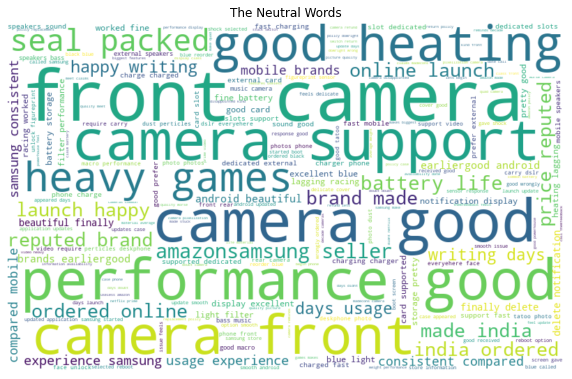

In [19]:
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=19).generate(normal_words_in_dataClean)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

#### 2. Analyzing with posotive words

In [20]:
with open("../positive-words.txt","r") as sw:
    positive_words = sw.read()

In [21]:
# removing the starting strings and collect actual posotive words
positive_words = positive_words[1537:].replace('\n', ' ')
#positive_words

In [22]:
positive_words_in_dataClean = " ".join([w for w in words_in_clean_text if w in positive_words])

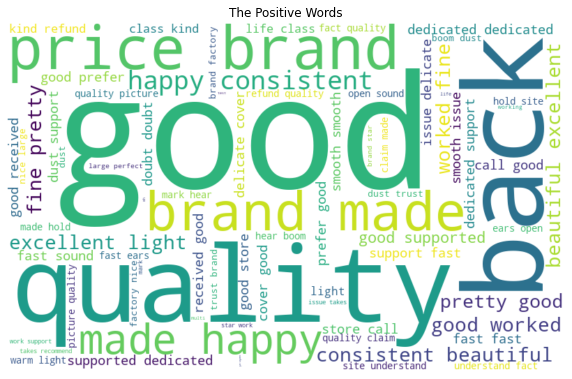

In [23]:
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=5).generate(positive_words_in_dataClean)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

#### 3. Analyzing with negative words

In [24]:
with open("../negative-words.txt", "r") as sw:
    negative_words = sw.read()

In [25]:
# removing the starting strings and collect actual posotive words
negative_words = negative_words[1540:]
#negative_words

In [26]:
nagative_words_in_dataClean = " ".join([w for w in words_in_clean_text if w in negative_words])

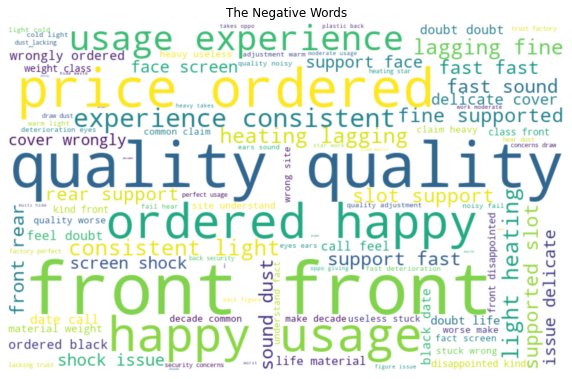

In [27]:
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 10).generate(nagative_words_in_dataClean)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="gaussian")
plt.axis('off')
plt.title('The Negative Words')
plt.show()